<a href="https://colab.research.google.com/github/vineethreddy09/aiml-2025/blob/main/LAb_08_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
fetch_openml(data_id=10)

{'data':     lymphatics block_of_affere bl_of_lymph_c  ... dislocation_of exclusion_of_no no_of_nodes_in
 0       arched             yes            no  ...            yes             yes              5
 1    displaced             yes            no  ...            yes             yes              3
 2     deformed              no            no  ...             no              no              7
 3       arched              no            no  ...             no             yes              1
 4       arched              no            no  ...             no              no              1
 ..         ...             ...           ...  ...            ...             ...            ...
 143  displaced              no            no  ...            yes             yes              2
 144   deformed              no            no  ...            yes             yes              6
 145   deformed             yes            no  ...            yes             yes              4
 146   deformed       

In [11]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name="car",version = 2,parser = 'auto')

In [12]:
type(car_data)

sklearn.utils._bunch.Bunch

car_data.keys()

In [16]:
car_data.feature_names,car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [17]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [18]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [19]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [20]:
type(car_data)

pandas.core.frame.DataFrame

<Axes: xlabel='binaryClass', ylabel='count'>

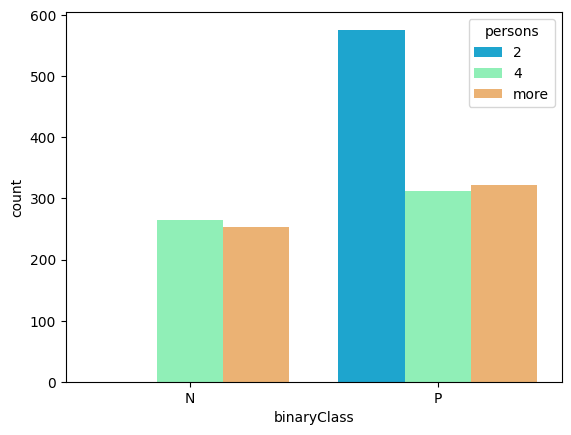

In [21]:
sns.countplot(x=car_data.binaryClass,hue='persons',data=car_data,palette='rainbow')

In [22]:
from sklearn.model_selection import train_test_split

train_data,test_data=train_data.shape)

In [24]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,med,med,2,2,med,low,P
freq,364,351,359,471,467,462,978


In [26]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [28]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [27]:
train_data['buying'].value_counts()

,count
buying,
med,364
high,345
vhigh,343
low,330


In [29]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [32]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
car_train_prepared.shape,car_labels_prepared.shape

((1382, 6), (1382,))

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

In [42]:
from sklearn.tree import export_text

text_representation= export_text(tree_clf,feature_names=list(car_train.columns))
print(text_representation)


|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
preds= tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared,preds)}")
print(classification_report(car_labels_prepared,preds))
print(confusion_matrix(car_labels_prepared,preds))


Accuracy:1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

[[404   0]
 [  0 978]]
